# Data Analysis on Bitcoin Data

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%matplotlib inline

In [3]:
sc

In [4]:
from pyspark.sql import HiveContext

In [5]:
hive_context = HiveContext(sc)

In [7]:
btc_data = hive_context.table("cryptocurrency.bitcoin_dataset_mod")

NameError: name 'hive_context' is not defined

In [7]:
btc_data.show()

+----------+----------------+------------------+--------------+----------------+---------------+------------------+-------------------+---------------------+----------------------+------------+--------------+------------------+------------------+-------------------------+--------------------+---------------+--------------+--------------------+--------------------+--------------------+----------+-------------------+----------------------+
|      date|btc_market_price|btc_total_bitcoins|btc_market_cap|btc_trade_volume|btc_blocks_size|btc_avg_block_size|btc_orphaned_blocks|btc_trnsctn_per_block|btc_median_confrm_time|btc_hashrate|btc_difficulty|btc_miners_revenue|btc_trnsction_fees|btc_cost_per_trnsctn_perc|btc_cost_per_trnsctn|btc_unique_addr|btc_n_trnsctns|btc_n_trnsctns_total|btc_n_trnsctn_ex_pop|btc_trnsctn_ex_chain|btc_op_vol|btc_est_trnsctn_vol|btc_est_trnsctn_volusd|
+----------+----------------+------------------+--------------+----------------+---------------+------------------+-

In [8]:
#Checking for nulls

from pyspark.sql.functions import col,count,isnan,lit
from pyspark.sql import functions as F

drop_list = ['date']
btc_temp = btc_data.select([column for column in btc_data.columns if column not in drop_list])

btc_temp.select([count(F.when(isnan(c), c)).alias(c) for c in btc_temp.columns]).show()

+----------------+------------------+--------------+----------------+---------------+------------------+-------------------+---------------------+----------------------+------------+--------------+------------------+------------------+-------------------------+--------------------+---------------+--------------+--------------------+--------------------+--------------------+----------+-------------------+----------------------+
|btc_market_price|btc_total_bitcoins|btc_market_cap|btc_trade_volume|btc_blocks_size|btc_avg_block_size|btc_orphaned_blocks|btc_trnsctn_per_block|btc_median_confrm_time|btc_hashrate|btc_difficulty|btc_miners_revenue|btc_trnsction_fees|btc_cost_per_trnsctn_perc|btc_cost_per_trnsctn|btc_unique_addr|btc_n_trnsctns|btc_n_trnsctns_total|btc_n_trnsctn_ex_pop|btc_trnsctn_ex_chain|btc_op_vol|btc_est_trnsctn_vol|btc_est_trnsctn_volusd|
+----------------+------------------+--------------+----------------+---------------+------------------+-------------------+--------------

In [9]:
btc_data.count()

3076

In [10]:
btc_data.printSchema()

root
 |-- date: date (nullable = true)
 |-- btc_market_price: float (nullable = true)
 |-- btc_total_bitcoins: float (nullable = true)
 |-- btc_market_cap: float (nullable = true)
 |-- btc_trade_volume: float (nullable = true)
 |-- btc_blocks_size: float (nullable = true)
 |-- btc_avg_block_size: float (nullable = true)
 |-- btc_orphaned_blocks: float (nullable = true)
 |-- btc_trnsctn_per_block: float (nullable = true)
 |-- btc_median_confrm_time: float (nullable = true)
 |-- btc_hashrate: float (nullable = true)
 |-- btc_difficulty: float (nullable = true)
 |-- btc_miners_revenue: float (nullable = true)
 |-- btc_trnsction_fees: float (nullable = true)
 |-- btc_cost_per_trnsctn_perc: float (nullable = true)
 |-- btc_cost_per_trnsctn: float (nullable = true)
 |-- btc_unique_addr: float (nullable = true)
 |-- btc_n_trnsctns: float (nullable = true)
 |-- btc_n_trnsctns_total: float (nullable = true)
 |-- btc_n_trnsctn_ex_pop: float (nullable = true)
 |-- btc_trnsctn_ex_chain: float (nul

In [11]:
btc_data = btc_data.select(btc_data.date,
                           btc_data.btc_market_price,
                           btc_data.btc_total_bitcoins,
                         btc_data.btc_market_cap,
                         btc_data.btc_trade_volume,
                           btc_data.btc_blocks_size,
                           btc_data.btc_orphaned_blocks,
                           btc_data.btc_trnsctn_per_block,
                           btc_data.btc_median_confrm_time,
                           btc_data.btc_hashrate,
                           btc_data.btc_difficulty,
                           btc_data.btc_miners_revenue,
                            btc_data.btc_trnsction_fees,
                            btc_data.btc_cost_per_trnsctn_perc,
                            btc_data.btc_unique_addr,
                            btc_data.btc_n_trnsctns,
                            btc_data.btc_n_trnsctns_total,
                          btc_data.btc_est_trnsctn_vol,
                          btc_data.btc_est_trnsctn_volusd)

In [12]:
btc_data.printSchema()

root
 |-- date: date (nullable = true)
 |-- btc_market_price: float (nullable = true)
 |-- btc_total_bitcoins: float (nullable = true)
 |-- btc_market_cap: float (nullable = true)
 |-- btc_trade_volume: float (nullable = true)
 |-- btc_blocks_size: float (nullable = true)
 |-- btc_orphaned_blocks: float (nullable = true)
 |-- btc_trnsctn_per_block: float (nullable = true)
 |-- btc_median_confrm_time: float (nullable = true)
 |-- btc_hashrate: float (nullable = true)
 |-- btc_difficulty: float (nullable = true)
 |-- btc_miners_revenue: float (nullable = true)
 |-- btc_trnsction_fees: float (nullable = true)
 |-- btc_cost_per_trnsctn_perc: float (nullable = true)
 |-- btc_unique_addr: float (nullable = true)
 |-- btc_n_trnsctns: float (nullable = true)
 |-- btc_n_trnsctns_total: float (nullable = true)
 |-- btc_est_trnsctn_vol: float (nullable = true)
 |-- btc_est_trnsctn_volusd: float (nullable = true)



### Data Preprocessing

In [13]:
import matplotlib
import seaborn as sns

In [14]:
import matplotlib.pyplot as plt

In [15]:
import pandas as pd

In [16]:
#Converting to Pandas data frame
btc_pdf = btc_data.toPandas()
btc_pdf.head(10)

,date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_orphaned_blocks,btc_trnsctn_per_block,btc_median_confrm_time,btc_hashrate,btc_difficulty,btc_miners_revenue,btc_trnsction_fees,btc_cost_per_trnsctn_perc,btc_unique_addr,btc_n_trnsctns,btc_n_trnsctns_total,btc_est_trnsctn_vol,btc_est_trnsctn_volusd
0,2009-11-10,0.0,1339450.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000004,1.0,0.0,0.0,0.000000,71.0,71.0,26958.0,0.0,0.0
1,2009-11-11,0.0,1342900.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000003,1.0,0.0,0.0,19.166666,71.0,78.0,27036.0,18000.0,0.0
2,2009-11-12,0.0,1346400.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000003,1.0,0.0,0.0,0.000000,70.0,70.0,27106.0,0.0,0.0
3,2009-11-13,0.0,1349900.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000003,1.0,0.0,0.0,673.076904,73.0,73.0,27179.0,520.0,0.0
4,2009-11-14,0.0,1354050.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000004,1.0,0.0,0.0,0.000000,83.0,83.0,27262.0,0.0,0.0
5,2009-11-15,0.0,1358850.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000005,1.0,0.0,0.0,0.000000,96.0,96.0,27358.0,0.0,0.0
6,2009-11-16,0.0,1363850.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000005,1.0,0.0,0.0,0.000000,100.0,100.0,27458.0,0.0,0.0
7,2009-11-17,0.0,1368400.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000005,1.0,0.0,0.0,0.000000,91.0,91.0,27549.0,0.0,0.0
8,2009-11-18,0.0,1372350.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000004,1.0,0.0,0.0,0.000000,79.0,79.0,27628.0,0.0,0.0
9,2009-11-19,0.0,1376000.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000004,1.0,0.0,0.0,0.000000,73.0,73.0,27701.0,0.0,0.0


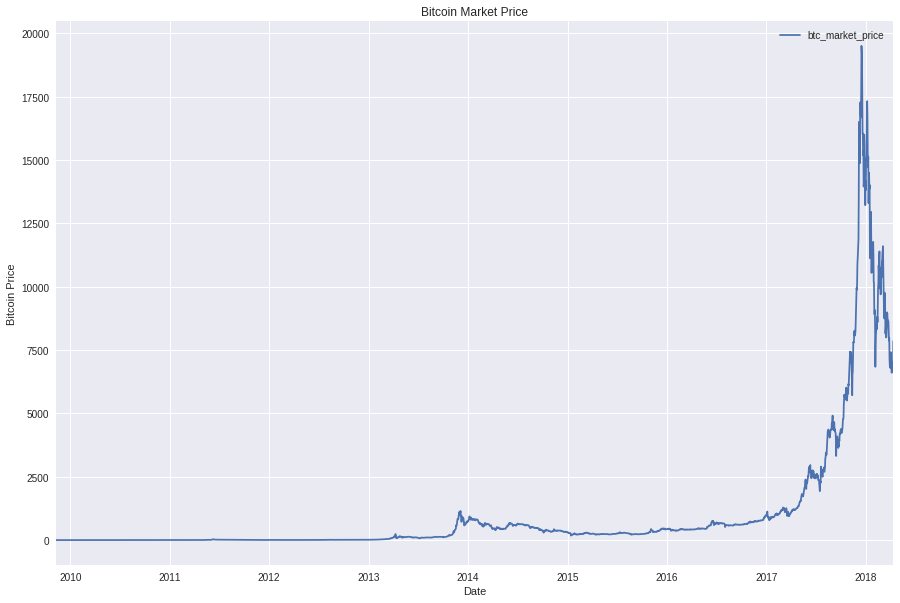

In [17]:
#Plots for different attributes
#Bitcoin Price

df = pd.concat([btc_pdf['date'],btc_pdf['btc_market_price']],axis=1)
ax = df.plot(x="date", y="btc_market_price", kind='line',title='Bitcoin Market Price',figsize=(15,10))
plt.xlabel("Date")
plt.ylabel("Bitcoin Price")
plt.show()

In [18]:
btc_preds = btc_pdf.iloc[280:,2:]

In [19]:
btc_preds.head(5)

,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_orphaned_blocks,btc_trnsctn_per_block,btc_median_confrm_time,btc_hashrate,btc_difficulty,btc_miners_revenue,btc_trnsction_fees,btc_cost_per_trnsctn_perc,btc_unique_addr,btc_n_trnsctns,btc_n_trnsctns_total,btc_est_trnsctn_vol,btc_est_trnsctn_volusd
280,3744250.0,287932.812500,923.001770,1.0,0.0,1.0,0.0,0.003333,511.773529,503.695007,0.67,13.567888,393.0,352.0,104808.0,48276.0,3712.0
281,3750900.0,277566.593750,206.778595,1.0,0.0,1.0,0.0,0.003384,511.773529,492.174011,1.56,18.583082,449.0,377.0,105185.0,35791.0,2649.0
282,3757900.0,258543.515625,51.878399,1.0,0.0,1.0,0.0,0.003562,511.773529,481.600006,0.00,50.886219,395.0,368.0,105553.0,13756.0,946.0
283,3766250.0,251208.875000,293.982513,1.0,0.0,1.0,0.0,0.004249,511.773529,556.945007,0.00,39.493370,433.0,398.0,105951.0,21143.0,1410.0
284,3775450.0,252573.828125,731.070190,1.0,0.0,1.0,0.0,0.004681,511.773529,615.470825,0.00,52.705029,396.0,348.0,106299.0,17456.0,1168.0


In [20]:
btc_preds.columns[btc_preds.isnull().any()].tolist()

['btc_trade_volume']

In [21]:
btc_preds = btc_preds.fillna(btc_preds.mean())

In [22]:
btc_preds.columns[btc_preds.isnull().any()].tolist()

[]

280    0.076900
281    0.074000
282    0.068800
283    0.066700
284    0.066899
Name: btc_market_price, dtype: float64

[1, -1, -1, -1, 1, -1, -1, 1, -1, -1, -1, 1, -1, 1, -1, -1, -1, 1, -1, 1, 1, -1, 1, 1, -1, -1, 1, -1, 1, 1, -1, -1, 1, 1, 1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, -1, -1, 1, 1, -1, -1, -1, -1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, -1, 1, -1, 1, 1, 1, -1, -1, -1, -1, 1, 1, -1, -1, -1, -1, 1, -1, 1, 1, -1, 1, -1, 1, 1, -1, 1, -1, -1, -1, 1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, 1, -1, 1, 1, -1, -1, -1, 1, 1, 1, -1, 1, 1, -1, 1, -1, -1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, -1, 1, -1, 1, 1, 1, -1, -1, 1, 1, 1, -1, -1, 1, 1, -1, 1, -1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1, -1, 1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, -1, 1, -1, -1, -1, -1, 1, -1, -1, 1, -1, -1, 1, 1, 1, -1, -1, 1, 1, 1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, -1, -1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, -1, -1, -1, -1, -1, -1, 1, 1, -1, 1, 1, -1, -1, -

(array([ 1313.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  1483.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

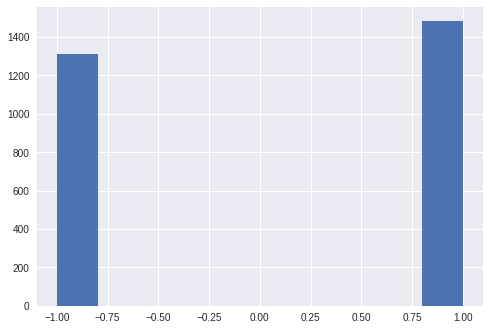

In [23]:
btc_tgt = btc_pdf.iloc[280:,1]
btc_tgt.head(5)

#creating target labels
btc_diff=[]
btc_diff.append(1)
for i in xrange(1,len(btc_tgt)):
    v = btc_tgt.iloc[i] - btc_tgt.iloc[i-1]
    if v < 0:
        btc_diff.append(-1)
    else:
        btc_diff.append(1)

print(btc_diff)
print(len(btc_diff))

plt.hist(btc_diff)
plt.show()

In [24]:
#Consolidating dataset and target
btc_preds = btc_preds.reset_index(drop=True)
btc_target = pd.DataFrame({'btc_target':btc_diff})
btc_target.shape
btc_preds.shape

btc_dat = pd.concat([btc_preds,btc_target],axis=1)
btc_dat.head(5)

(2796, 1)

(2796, 17)

,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_orphaned_blocks,btc_trnsctn_per_block,btc_median_confrm_time,btc_hashrate,btc_difficulty,btc_miners_revenue,btc_trnsction_fees,btc_cost_per_trnsctn_perc,btc_unique_addr,btc_n_trnsctns,btc_n_trnsctns_total,btc_est_trnsctn_vol,btc_est_trnsctn_volusd,btc_target
0,3744250.0,287932.812500,923.001770,1.0,0.0,1.0,0.0,0.003333,511.773529,503.695007,0.67,13.567888,393.0,352.0,104808.0,48276.0,3712.0,1
1,3750900.0,277566.593750,206.778595,1.0,0.0,1.0,0.0,0.003384,511.773529,492.174011,1.56,18.583082,449.0,377.0,105185.0,35791.0,2649.0,-1
2,3757900.0,258543.515625,51.878399,1.0,0.0,1.0,0.0,0.003562,511.773529,481.600006,0.00,50.886219,395.0,368.0,105553.0,13756.0,946.0,-1
3,3766250.0,251208.875000,293.982513,1.0,0.0,1.0,0.0,0.004249,511.773529,556.945007,0.00,39.493370,433.0,398.0,105951.0,21143.0,1410.0,-1
4,3775450.0,252573.828125,731.070190,1.0,0.0,1.0,0.0,0.004681,511.773529,615.470825,0.00,52.705029,396.0,348.0,106299.0,17456.0,1168.0,1


In [25]:
#Summary

btc_dat.describe()

,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_orphaned_blocks,btc_trnsctn_per_block,btc_median_confrm_time,btc_hashrate,btc_difficulty,btc_miners_revenue,btc_trnsction_fees,btc_cost_per_trnsctn_perc,btc_unique_addr,btc_n_trnsctns,btc_n_trnsctns_total,btc_est_trnsctn_vol,btc_est_trnsctn_volusd,btc_target
count,2.796000e+03,2.796000e+03,2.796000e+03,2796.000000,2796.000000,2796.000000,2796.000000,2.796000e+03,2.796000e+03,2.796000e+03,2796.000000,2796.000000,2.796000e+03,2796.000000,2.796000e+03,2.796000e+03,2.796000e+03,2796.000000
mean,1.216041e+07,1.776383e+10,1.019554e+08,40597.012744,0.378398,728.735054,8.068525,1.908657e+06,2.493575e+11,2.704601e+06,64.226510,5.499798,2.122179e+05,110775.619814,7.884172e+07,2.142336e+05,2.418152e+08,0.060801
std,3.722666e+06,4.479255e+10,3.365322e+08,47488.093832,0.855510,685.505449,4.694118,4.685165e+06,6.060253e+11,6.223675e+06,119.063343,10.649948,2.099013e+05,103264.620226,9.015591e+07,2.693549e+05,6.154939e+08,0.998328
min,3.744250e+06,2.392845e+05,4.106280e+01,1.000000,0.000000,1.000000,0.000000,3.332692e-03,5.117735e+02,3.378946e+02,0.000000,0.136531,2.840000e+02,268.000000,1.048080e+05,6.221000e+03,5.270000e+02,-1.000000
25%,9.466150e+06,1.063307e+08,4.683184e+05,1834.750000,0.000000,184.500000,6.716667,1.432171e+01,1.888787e+06,7.778738e+04,11.780687,1.150242,2.653150e+04,27359.250000,4.992869e+06,1.112772e+05,2.041503e+06,-1.000000
50%,1.289720e+07,3.734554e+09,1.267712e+07,19314.500000,0.000000,428.500000,8.116667,1.031504e+05,1.175655e+10,9.901988e+05,24.309159,2.198968,1.506390e+05,68774.500000,4.073204e+07,1.849655e+05,4.661239e+07,1.000000
75%,1.554228e+07,9.320606e+09,3.466118e+07,68182.626953,0.000000,1311.704559,10.633333,1.360581e+06,1.940000e+11,2.050717e+06,53.376146,4.761191,3.841722e+05,199060.250000,1.288471e+08,2.620421e+05,1.533215e+08,1.000000
max,1.697410e+07,3.265250e+11,5.352015e+09,163895.156250,7.000000,2722.625000,47.733334,3.141644e+07,3.511060e+12,5.319158e+07,1495.946533,143.179367,1.072861e+06,490644.000000,3.098331e+08,5.825066e+06,5.760245e+09,1.000000


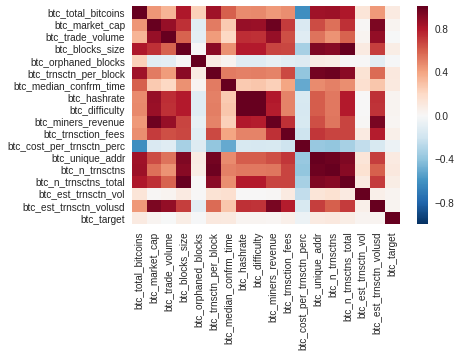

In [81]:
#Checking correlation
corr_mat = btc_dat.corr()

#Heatmap
sns.heatmap(corr_mat)

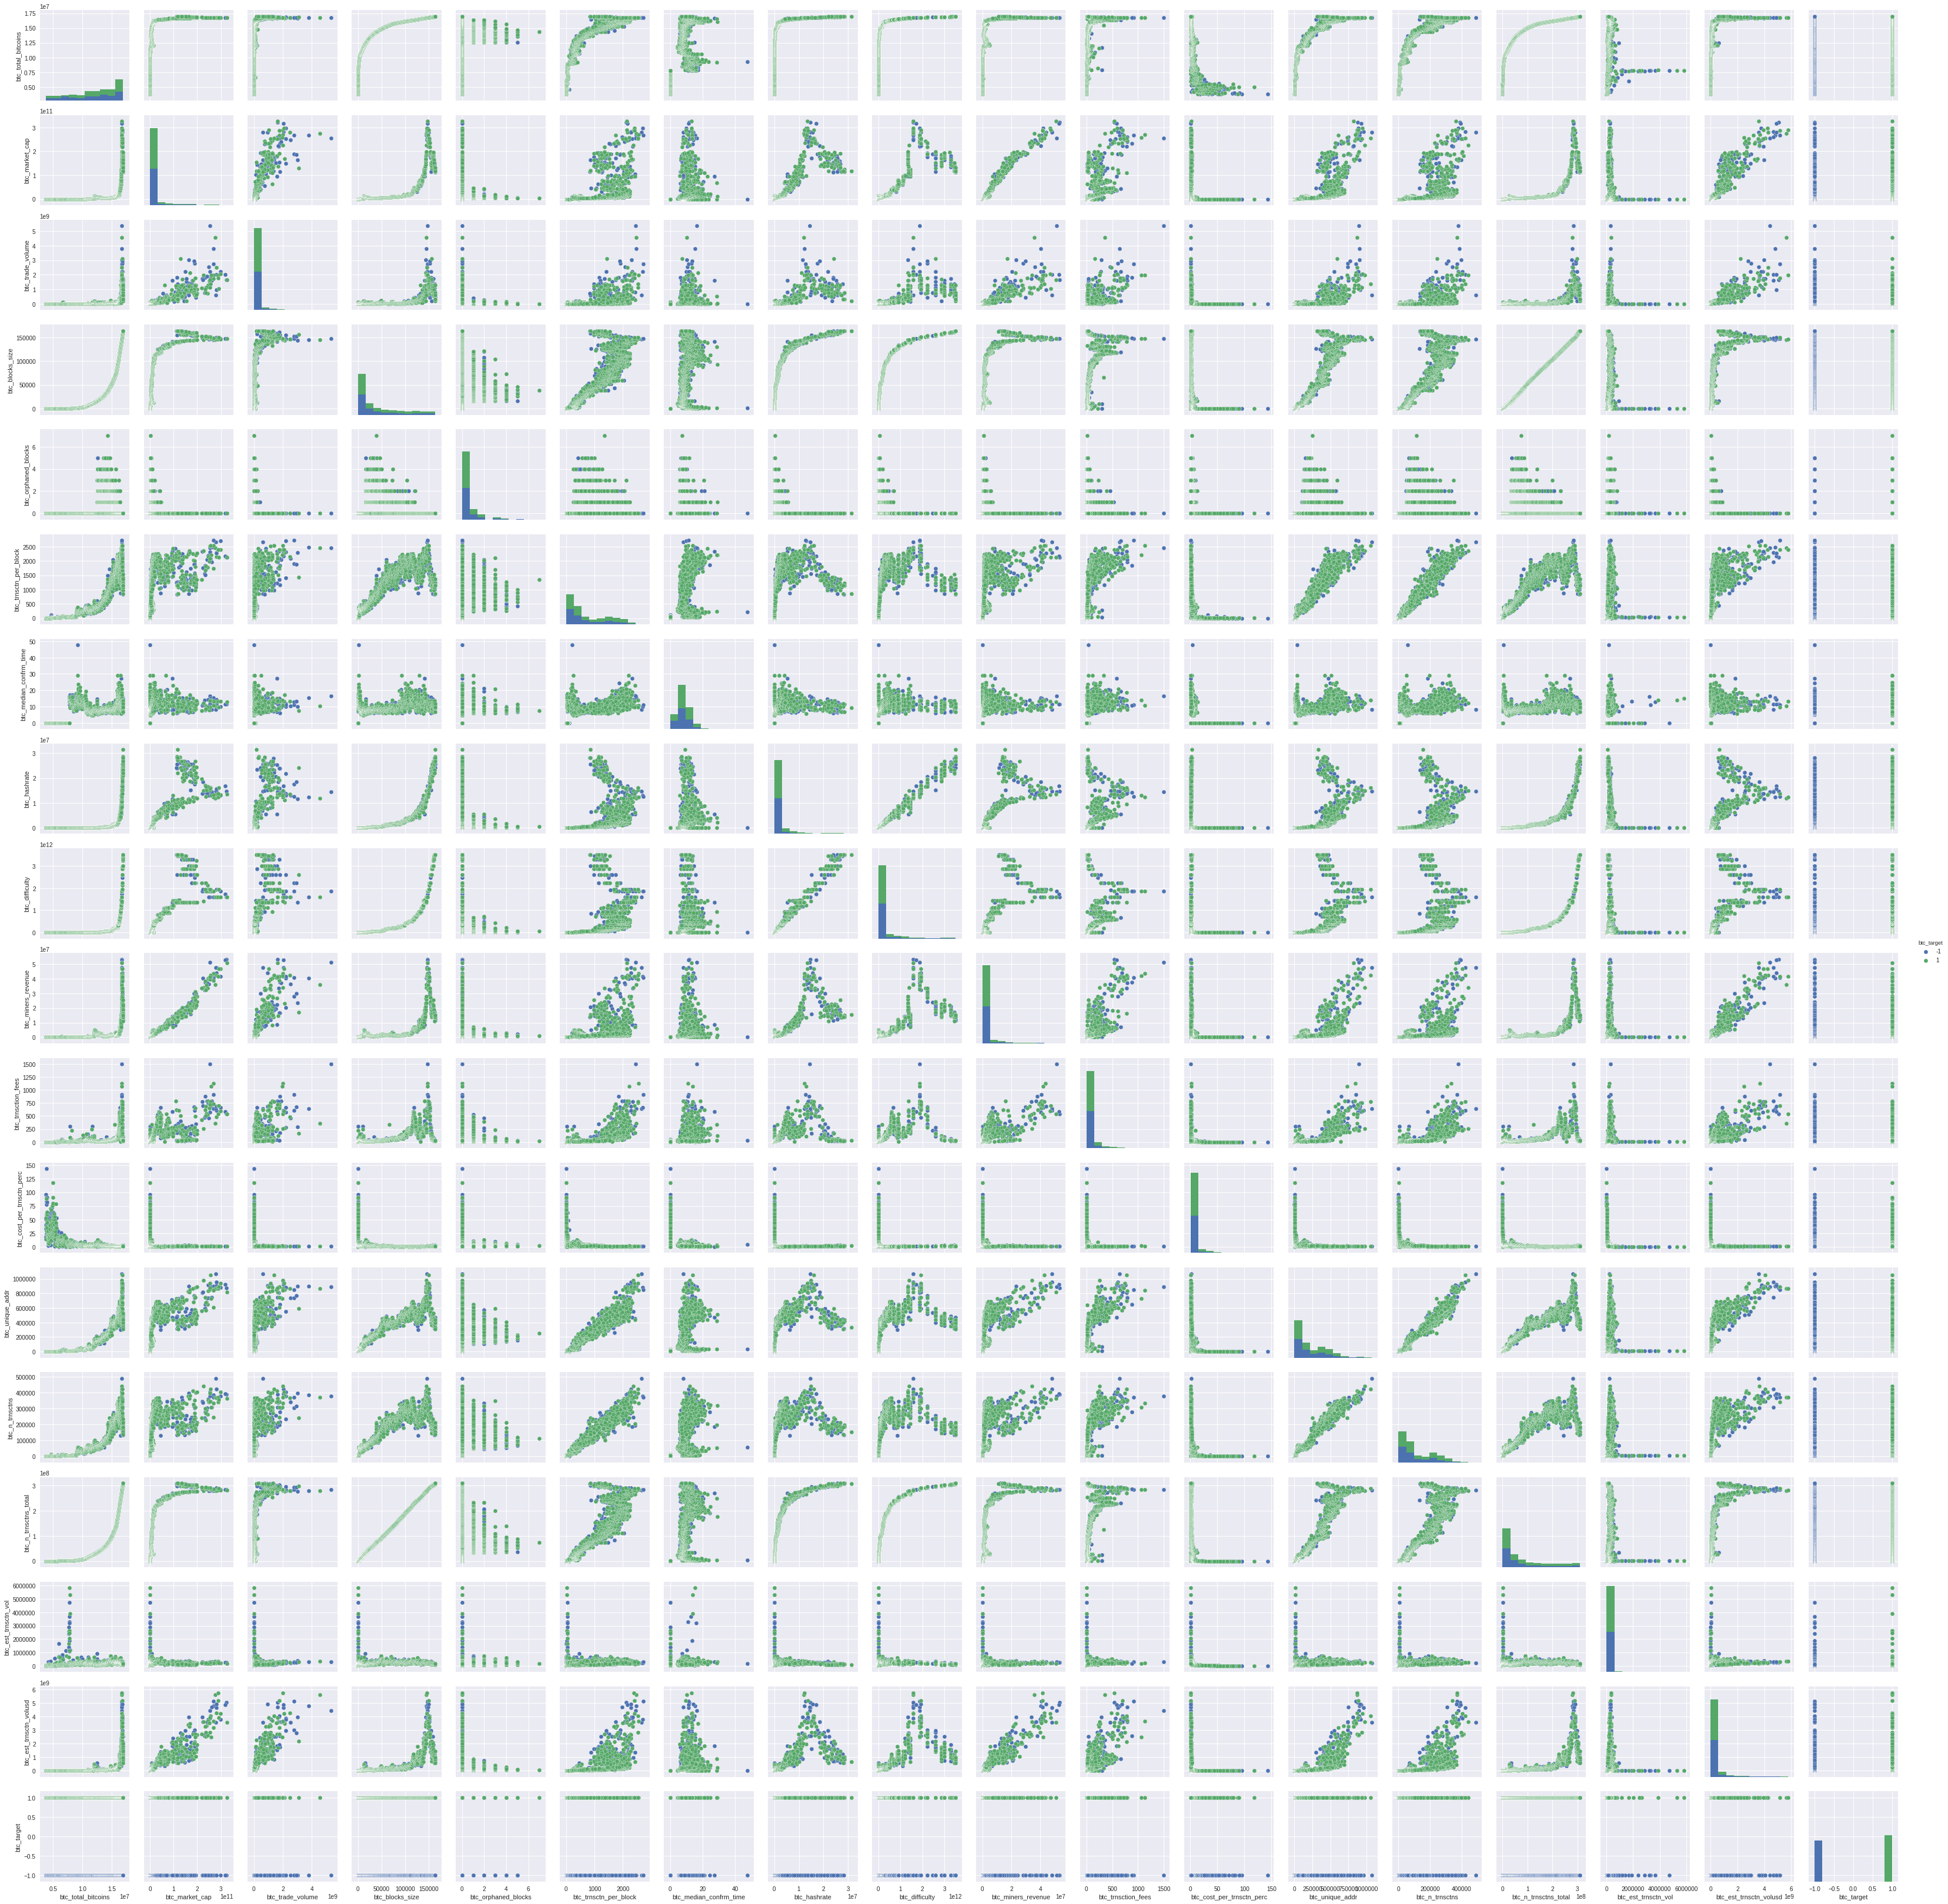

In [82]:
#Pairplots
var_plot = sns.pairplot(data = btc_dat, hue = "btc_target", kind='scatter')
plt.show()

In [26]:
#Importing the required packages

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats
import pylab as pl
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [36]:
#Dividing into train and test datasets

x_train, x_test, y_train, y_test = train_test_split(
          btc_preds, btc_diff, test_size=0.10, random_state=42)

In [37]:
x_train.head(5)
x_test.head(5)
y_train = pd.DataFrame({'y_train':y_train})
y_test = pd.DataFrame({'y_test':y_test})

y_train.head(5)
y_test.head(5)

,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_orphaned_blocks,btc_trnsctn_per_block,btc_median_confrm_time,btc_hashrate,btc_difficulty,btc_miners_revenue,btc_trnsction_fees,btc_cost_per_trnsctn_perc,btc_unique_addr,btc_n_trnsctns,btc_n_trnsctns_total,btc_est_trnsctn_vol,btc_est_trnsctn_volusd
188,5476400.0,4.817042e+06,1428.100830,10.0,0.0,7.0,0.0,0.337112,3.645989e+04,8180.279785,0.500000,33.661091,2857.0,1969.0,284980.0,27628.0,24302.0
170,5300500.0,3.975375e+06,6052.395020,10.0,0.0,4.0,0.0,0.163042,2.201238e+04,5587.500000,0.118190,19.615608,975.0,777.0,255401.0,37980.0,28485.0
321,6737650.0,1.067918e+08,756970.812500,202.0,0.0,53.0,0.0,11.243843,1.379192e+06,130207.750000,15.262289,13.525298,20364.0,9495.0,945327.0,60738.0,962698.0
43,4141000.0,2.575288e+05,1408.538452,1.0,0.0,2.0,0.0,0.011603,1.318670e+03,550.443665,1.030000,11.796679,1000.0,998.0,122626.0,75030.0,4666.0
87,4567900.0,1.146543e+06,10587.301758,1.0,0.0,1.0,0.0,0.038561,4.536354e+03,2146.050049,0.000000,70.264076,333.0,296.0,142002.0,12168.0,3054.0


,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_orphaned_blocks,btc_trnsctn_per_block,btc_median_confrm_time,btc_hashrate,btc_difficulty,btc_miners_revenue,btc_trnsction_fees,btc_cost_per_trnsctn_perc,btc_unique_addr,btc_n_trnsctns,btc_n_trnsctns_total,btc_est_trnsctn_vol,btc_est_trnsctn_volusd
1025,11256900.0,1.241580e+09,1.038112e+07,8247.0000,0.0,232.000000,7.716667,1.248974e+02,1.560563e+07,4.483492e+05,40.484688,1.722431,60504.0,54331.0,19118016.0,236004.000000,26030024.0
2407,16227288.0,1.690883e+10,5.871887e+07,107450.1250,0.0,2037.007324,11.950000,3.216051e+06,4.760000e+11,1.948540e+06,241.157883,0.668189,512637.0,277033.0,206666400.0,290510.531250,302711968.0
450,7636650.0,2.290995e+07,9.961279e+04,527.0000,0.0,37.000000,0.000000,8.674541e+00,1.203462e+06,2.175900e+04,3.431216,5.803499,11557.0,6364.0,1836551.0,124976.000000,374929.0
2595,16585563.0,6.141701e+10,1.385924e+08,133945.1875,0.0,1277.772461,7.883333,7.953302e+06,1.100000e+12,6.815446e+06,83.675194,1.952551,383448.0,185277.0,256968560.0,97112.703125,359612288.0
439,7557550.0,2.758702e+07,1.751543e+05,505.0000,0.0,46.000000,0.000000,7.079486e+00,1.468195e+06,1.771471e+04,3.409929,6.068410,9259.0,4888.0,1771888.0,79972.000000,291917.0


,y_train
0,-1
1,-1
2,1
3,-1
4,1


,y_test
0,-1
1,1
2,-1
3,-1
4,-1


In [38]:
#Scaling datasets

from sklearn import preprocessing

#Keeping the scaling parameters from the training dataset to be later applied to the test dataset
train_scaler = preprocessing.StandardScaler().fit(x_train)
train_scaler

x_trains = pd.DataFrame(data = train_scaler.transform(x_train))
x_trains.shape
x_trains.describe()
x_trains.head(10)

x_tests = pd.DataFrame(data = train_scaler.transform(x_test))
x_tests.shape
x_tests.describe()
x_tests.head(10)

StandardScaler(copy=True, with_mean=True, with_std=True)

(2516, 17)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,2.516000e+03,2.516000e+03,2.516000e+03,2.516000e+03,2.516000e+03,2.516000e+03,2.516000e+03,2.516000e+03,2.516000e+03,2.516000e+03,2.516000e+03,2.516000e+03,2.516000e+03,2.516000e+03,2.516000e+03,2.516000e+03,2.516000e+03
mean,2.432915e-16,-3.481582e-17,2.475497e-17,-1.011380e-16,-3.148427e-16,6.345392e-17,-3.989037e-17,4.783314e-17,3.020460e-17,-2.618908e-17,1.648125e-17,-4.677410e-18,1.667982e-17,-1.610618e-17,9.818149e-17,4.086115e-17,-7.832456e-18
std,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00
min,-2.248820e+00,-3.965923e-01,-3.014953e-01,-8.505162e-01,-4.437218e-01,-1.060666e+00,-1.715533e+00,-4.030182e-01,-4.059523e-01,-4.389323e-01,-5.399103e-01,-5.002463e-01,-1.009559e+00,-1.068701e+00,-8.690778e-01,-7.754233e-01,-3.929294e-01
25%,-7.329930e-01,-3.942715e-01,-3.001643e-01,-8.139257e-01,-4.437218e-01,-7.952499e-01,-2.800807e-01,-4.030152e-01,-4.059493e-01,-4.266446e-01,-4.399479e-01,-4.067645e-01,-8.846625e-01,-8.093631e-01,-8.173413e-01,-3.826605e-01,-3.897105e-01
50%,1.947864e-01,-3.106560e-01,-2.643199e-01,-4.498170e-01,-4.437218e-01,-4.373238e-01,2.019698e-02,-3.843084e-01,-3.888872e-01,-2.748822e-01,-3.327112e-01,-3.104951e-01,-2.902583e-01,-4.067367e-01,-4.233625e-01,-1.071699e-01,-3.155980e-01
75%,9.041740e-01,-1.864529e-01,-1.995482e-01,5.672851e-01,-4.437218e-01,8.578177e-01,5.534795e-01,-1.196154e-01,-1.138006e-01,-1.005651e-01,-8.978952e-02,-7.934090e-02,8.337966e-01,8.622721e-01,5.393158e-01,1.821033e-01,-1.391405e-01
max,1.298471e+00,6.960666e+00,1.561175e+01,2.612936e+00,7.679801e+00,2.935808e+00,8.492126e+00,6.229154e+00,5.324563e+00,8.356139e+00,1.226020e+01,1.261790e+01,4.140743e+00,3.698757e+00,2.579389e+00,2.097889e+01,9.163603e+00


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-1.784383,-0.396488,-0.301491,-0.850326,-0.443722,-1.051855,-1.715533,-0.403018,-0.405952,-0.437636,-0.535632,2.574217,-0.997203,-1.052164,-0.867072,-0.695391,-0.392890
1,-1.831546,-0.396507,-0.301477,-0.850326,-0.443722,-1.056261,-1.715533,-0.403018,-0.405952,-0.438064,-0.538899,1.286137,-1.006240,-1.063753,-0.867401,-0.656689,-0.392883
2,-1.446206,-0.394166,-0.299245,-0.846269,-0.443722,-0.984308,-1.715533,-0.403016,-0.405950,-0.417459,-0.409318,0.727608,-0.913138,-0.978996,-0.859720,-0.571606,-0.391333
3,-2.142441,-0.396592,-0.301491,-0.850516,-0.443722,-1.059197,-1.715533,-0.403018,-0.405952,-0.438897,-0.531097,0.569080,-1.006120,-1.061604,-0.868879,-0.518174,-0.392923
4,-2.027977,-0.396572,-0.301464,-0.850516,-0.443722,-1.060666,-1.715533,-0.403018,-0.405952,-0.438633,-0.539910,5.930996,-1.009323,-1.068429,-0.868664,-0.753190,-0.392925
5,0.572274,-0.321884,-0.272412,-0.070546,0.716781,0.319644,0.180583,-0.335098,-0.328280,-0.309013,-0.384771,-0.368805,0.177332,0.144163,-0.070266,0.015342,-0.309854
6,0.920934,-0.240182,-0.227027,0.607492,-0.443722,1.001491,-0.001188,-0.099277,-0.089319,-0.163449,-0.098511,-0.414342,0.692166,0.964451,0.581027,0.516876,-0.135331
7,-1.550173,-0.395249,-0.300767,-0.849248,-0.443722,-1.001929,-1.715533,-0.403017,-0.405952,-0.414428,-0.366583,1.130933,-0.952436,-1.005022,-0.863942,-0.466608,-0.391555
8,1.050875,-0.107721,-0.271038,1.146589,-0.443722,1.393440,0.387302,0.055906,0.100009,-0.207754,0.151625,-0.427032,0.998622,1.221045,1.136176,-0.061528,-0.134400
9,-0.104394,-0.363702,-0.294901,-0.627233,-0.443722,-0.678878,-0.621346,-0.402757,-0.405769,-0.325871,-0.228697,-0.196628,-0.713033,-0.485203,-0.599642,-0.195582,-0.360006


(280, 17)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000
mean,0.077754,0.079236,0.016482,0.073584,-0.045835,0.079395,0.098878,-0.000906,0.010306,0.082007,0.096319,-0.083809,0.080944,0.056509,0.075560,0.022483,0.082414
std,0.978529,1.183276,1.006047,1.032458,0.924562,1.061651,1.033427,0.884341,0.884858,1.258925,1.170984,0.729336,1.073817,1.037439,1.034777,1.067927,1.192392
min,-2.181346,-0.396592,-0.301495,-0.850516,-0.443722,-1.060666,-1.715533,-0.403018,-0.405952,-0.438916,-0.539910,-0.494658,-1.009074,-1.067826,-0.868965,-0.739342,-0.392928
25%,-0.529940,-0.393722,-0.299059,-0.785455,-0.443722,-0.755236,-0.249786,-0.403014,-0.405947,-0.423787,-0.432732,-0.412415,-0.858640,-0.763823,-0.781776,-0.381928,-0.387937
50%,0.291708,-0.313731,-0.262947,-0.379499,-0.443722,-0.381524,0.043364,-0.360055,-0.364110,-0.278768,-0.329465,-0.316767,-0.232819,-0.383817,-0.359667,-0.106819,-0.315666
75%,0.992099,-0.162226,-0.177792,0.842359,-0.443722,0.938752,0.726340,-0.083303,-0.050147,-0.076716,-0.028496,-0.056151,0.834052,0.947279,0.814256,0.175560,-0.122558
max,1.288741,7.039301,8.638489,2.572816,4.198291,2.652675,3.561157,5.265436,5.245372,7.922638,8.578061,5.731834,4.053591,3.060640,2.542563,13.785517,7.732621


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.234470,-0.368323,-0.270629,-0.676260,-0.443722,-0.721462,-0.065342,-0.402992,-0.405927,-0.364855,-0.193502,-0.354807,-0.720394,-0.543098,-0.657388,0.083642,-0.349745
1,1.098230,-0.011536,-0.126906,1.420126,-0.443722,1.929037,0.839946,0.275907,0.370943,-0.116801,1.523564,-0.451489,1.450659,1.622021,1.430747,0.287420,0.109284
2,-1.205159,-0.396076,-0.301199,-0.839401,-0.443722,-1.007803,-1.715533,-0.403016,-0.405950,-0.435390,-0.510551,0.019459,-0.955428,-1.009436,-0.849797,-0.331446,-0.392308
3,1.194294,1.002041,0.110584,1.980026,-0.443722,0.814165,-0.029701,1.275965,1.389393,0.687933,0.176059,-0.333703,0.830319,0.729965,1.990804,-0.435616,0.203684
4,-1.226368,-0.395970,-0.300975,-0.839866,-0.443722,-0.994587,-1.715533,-0.403017,-0.405950,-0.436059,-0.510733,0.043753,-0.966462,-1.023785,-0.850517,-0.499698,-0.392446
5,0.191814,-0.211851,0.001651,-0.451920,-0.443722,-0.552594,-0.247113,-0.383378,-0.388887,0.029316,-0.446514,-0.042769,-0.337335,-0.476522,-0.425252,-0.471505,-0.301245
6,0.717740,-0.265626,0.010523,0.173891,0.716781,0.357823,0.251865,-0.313516,-0.304346,-0.216987,-0.261667,-0.455741,0.692104,0.534911,0.146467,1.279758,-0.034714
7,0.640050,-0.319486,-0.234030,0.042786,0.716781,0.268249,0.098608,-0.317297,-0.319939,-0.288588,-0.324844,-0.412413,0.055952,0.064559,0.027039,0.533743,-0.255026
8,-0.193426,-0.371655,-0.288911,-0.661657,-0.443722,-0.711183,0.333840,-0.402977,-0.405910,-0.378672,-0.324834,-0.391331,-0.736874,-0.679382,-0.640372,0.274191,-0.347227
9,0.089643,-0.237659,-0.278053,-0.523706,-0.443722,-0.451274,-0.011880,-0.397052,-0.399725,-0.093128,-0.444931,-0.029333,-0.340768,-0.497055,-0.491862,-0.533719,-0.327099


### Random Forest Algorithm

In [39]:
#Random Forest Model -- 2 labels
param_grid = {
    'n_estimators': [1, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini','entropy'],
    'min_samples_leaf': [5, 1000]
}
rdforest = RandomForestClassifier(max_features= 'log2' ,n_estimators=5,criterion='entropy',min_samples_leaf=22, 
                                  oob_score=True, n_jobs=-1, random_state=0)
rdforestmod = GridSearchCV(rdforest, param_grid, cv=2)
rdforestmod.fit(x_train, y_train.values.ravel())
print(rdforestmod.best_params_)
rdpreds = rdforestmod.predict(x_test)
print(rdpreds)

GridSearchCV(cv=2, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=22,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=5, n_jobs=-1, oob_score=True, random_state=0,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [1, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'criterion': ['gini', 'entropy'], 'min_samples_leaf': [5, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

{'max_features': 'auto', 'n_estimators': 1000, 'criterion': 'entropy', 'min_samples_leaf': 5}
[-1  1 -1  1 -1  1 -1  1  1 -1 -1 -1  1  1  1 -1 -1  1  1  1 -1  1  1 -1  1
 -1 -1 -1  1  1  1  1  1  1  1 -1  1 -1 -1  1 -1 -1  1 -1 -1  1  1 -1 -1 -1
  1 -1  1  1  1 -1 -1 -1 -1  1  1 -1  1 -1  1  1  1 -1 -1 -1  1 -1  1 -1  1
  1 -1 -1 -1 -1  1  1  1  1  1 -1 -1  1 -1 -1  1 -1 -1  1  1  1  1  1 -1 -1
 -1  1  1  1  1 -1 -1  1 -1  1  1  1 -1  1  1 -1  1 -1  1  1  1  1  1 -1  1
  1 -1  1  1  1  1  1 -1  1 -1  1  1 -1  1  1  1 -1  1  1  1  1  1  1 -1 -1
 -1 -1  1  1 -1  1 -1  1 -1  1  1  1 -1 -1 -1 -1  1  1 -1  1 -1  1 -1  1  1
  1  1 -1 -1  1  1  1  1  1  1 -1 -1 -1 -1  1 -1  1  1  1  1 -1  1 -1 -1 -1
 -1  1  1 -1  1  1  1  1  1  1 -1 -1 -1 -1 -1  1  1  1 -1  1  1 -1  1  1 -1
 -1  1  1  1 -1  1  1  1  1 -1 -1  1  1 -1  1  1 -1  1 -1 -1  1  1  1  1 -1
  1  1  1 -1  1  1 -1  1 -1  1  1 -1  1 -1 -1  1  1  1 -1  1  1 -1  1 -1  1
  1  1 -1  1  1]


[[62 67]
 [53 98]]
0.571428571429
0.564813388778
0.566534914361
0.564224942934


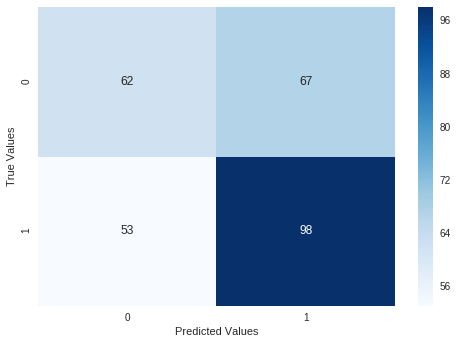

precision: [ 0.53913043  0.59393939]
recall: [ 0.48062016  0.64900662]
fscore: [ 0.50819672  0.62025316]
support: [129 151]


In [40]:
#Evaluation Metrics for Random Forest -- 2 labels
#Confusion Matrix, accuracy, recall, precision and f1-score
print(metrics.confusion_matrix(y_test, rdpreds))
print(metrics.accuracy_score(y_test, rdpreds))
print(metrics.recall_score(y_test, rdpreds,average='macro'))
print(metrics.precision_score(y_test, rdpreds,average='macro'))
print(metrics.f1_score(y_test, rdpreds,average='macro'))

ht = sns.heatmap(pd.DataFrame(metrics.confusion_matrix(y_test, rdpreds)), annot=True, cmap="Blues")
ht.set(xlabel='Predicted Values', ylabel='True Values')
plt.show()

#Another way to view these metrics for every class label
precision, recall, fscore, support = metrics.precision_recall_fscore_support(y_test, rdpreds)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

### Logistic Regression Algorithm

In [100]:
#Logistic Regression Model -- 2 labels
param_grid = {
    'C': [0.001, 100]
}
logrmodel = LogisticRegression(C=0.01)
logmodel = GridSearchCV(logrmodel, param_grid, cv=2)
logmodel.fit(x_trains, y_train.values.ravel())
print(logmodel.best_params_)
log_preds = logmodel.predict(x_tests)
print(log_preds)

GridSearchCV(cv=2, error_score='raise',
       estimator=LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1, param_grid={'C': [0.001, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

{'C': 100}
[ 1  1 -1  1 -1 -1 -1 -1  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1 -1  1  1
 -1  1  1  1  1 -1 -1  1 -1  1 -1  1 -1 -1 -1  1 -1  1 -1 -1 -1  1 -1  1 -1
 -1 -1  1  1  1 -1 -1  1 -1  1  1  1 -1  1  1 -1  1 -1 -1 -1 -1 -1 -1 -1  1
  1 -1 -1 -1 -1  1  1  1  1  1  1 -1  1  1  1  1 -1 -1 -1 -1  1 -1  1 -1 -1
 -1  1  1 -1  1  1 -1  1 -1  1  1  1  1  1 -1  1  1  1 -1 -1  1  1 -1  1  1
  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1  1 -1 -1  1  1  1  1 -1  1  1  1 -1
 -1 -1  1  1 -1  1 -1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1
  1 -1 -1  1  1  1  1 -1  1  1  1  1 -1 -1  1  1  1  1  1 -1  1 -1  1  1  1
 -1 -1  1 -1 -1  1  1  1 -1 -1  1  1  1 -1  1  1 -1  1 -1  1  1 -1 -1 -1 -1
 -1  1 -1  1 -1  1  1 -1 -1  1  1  1  1  1 -1  1 -1  1  1 -1  1  1  1 -1 -1
  1  1 -1  1  1  1  1 -1 -1 -1  1 -1  1 -1 -1  1  1  1 -1  1  1 -1  1 -1  1
  1  1  1  1  1]


[[62 67]
 [54 97]]
0.567857142857
0.5615021305
0.562973086627
0.560997732426


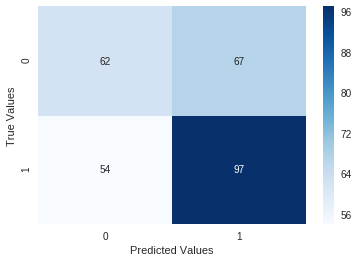

precision: [ 0.53448276  0.59146341]
recall: [ 0.48062016  0.64238411]
fscore: [ 0.50612245  0.61587302]
support: [129 151]


In [101]:
#Calculating test metrics to evaluate the model -- 2 labels
#Confusion Matrix, accuracy, recall, precision and f1-score
print(metrics.confusion_matrix(y_test, log_preds))
print(metrics.accuracy_score(y_test, log_preds))
print(metrics.recall_score(y_test, log_preds,average='macro'))
print(metrics.precision_score(y_test, log_preds,average='macro'))
print(metrics.f1_score(y_test, log_preds,average='macro'))

ht = sns.heatmap(pd.DataFrame(metrics.confusion_matrix(y_test, log_preds)), annot=True, cmap="Blues")
ht.set(xlabel='Predicted Values', ylabel='True Values')
plt.show()

#Another way to view these metrics for every class label
precision, recall, fscore, support = metrics.precision_recall_fscore_support(y_test, log_preds)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

### K-Nearest Neighbors

In [102]:
#Knn -- 2 labels
param_grid = {
    'n_neighbors': [1, 100],
    'algorithm': ['ball_tree','kd_tree','brute'],
    'leaf_size': [10, 10000],
    'metric': ['euclidean','manhattan','chebyshev']
}
knn_mod = KNeighborsClassifier(n_neighbors = 12, algorithm = 'ball_tree', leaf_size=1000, metric='manhattan',p=3,n_jobs=-1)
knnmod = GridSearchCV(knn_mod, param_grid, cv=2) 
knnmod.fit(x_trains, y_train.values.ravel())
print(knnmod.best_params_)
knn_preds = knnmod.predict(x_tests)
print(knn_preds)

GridSearchCV(cv=2, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='ball_tree', leaf_size=1000,
           metric='manhattan', metric_params=None, n_jobs=-1,
           n_neighbors=12, p=3, weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 100], 'metric': ['euclidean', 'manhattan', 'chebyshev'], 'leaf_size': [10, 10000], 'algorithm': ['ball_tree', 'kd_tree', 'brute']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

{'n_neighbors': 100, 'metric': 'manhattan', 'leaf_size': 10, 'algorithm': 'ball_tree'}
[ 1  1 -1  1 -1 -1  1 -1  1 -1  1 -1  1  1  1 -1 -1 -1  1 -1  1  1  1 -1  1
  1 -1  1  1  1 -1  1  1 -1  1 -1  1 -1 -1  1  1 -1  1 -1 -1  1 -1  1 -1 -1
 -1 -1  1  1  1 -1  1 -1 -1  1  1  1 -1  1  1 -1  1 -1  1 -1  1 -1 -1 -1  1
  1  1 -1 -1 -1  1  1  1  1  1  1 -1  1 -1 -1  1  1  1 -1  1  1 -1  1 -1 -1
 -1  1 -1  1  1  1 -1  1 -1  1  1  1  1  1  1  1  1  1 -1 -1  1  1 -1  1  1
  1 -1 -1 -1  1  1  1 -1  1  1  1  1 -1 -1 -1  1 -1  1  1  1 -1 -1  1  1  1
  1 -1  1  1 -1  1 -1  1  1  1  1  1  1 -1  1 -1  1  1  1  1  1  1 -1  1  1
  1 -1 -1  1  1  1  1 -1  1  1 -1  1 -1 -1  1  1  1  1  1 -1  1 -1  1  1 -1
 -1  1  1 -1  1  1  1  1  1  1 -1  1  1 -1 -1  1 -1  1 -1  1  1  1 -1 -1 -1
 -1  1 -1  1 -1  1  1 -1 -1  1 -1  1  1  1 -1  1 -1  1  1 -1  1  1  1 -1 -1
 -1  1 -1 -1  1  1 -1 -1 -1 -1  1 -1  1 -1 -1  1  1  1 -1  1  1 -1  1 -1  1
 -1  1 -1  1  1]


[[59 70]
 [54 97]]
0.557142857143
0.549874223523
0.551481108579
0.548833099433


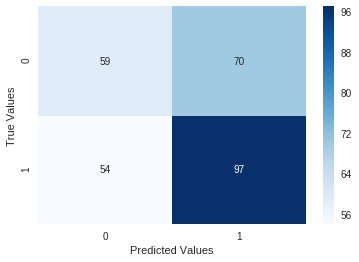

precision: [ 0.52212389  0.58083832]
recall: [ 0.45736434  0.64238411]
fscore: [ 0.48760331  0.61006289]
support: [129 151]


In [103]:
#Evaluation Metrics for KNN -- 2 labels
#Confusion Matrix, accuracy, recall, precision and f1-score
print(metrics.confusion_matrix(y_test, knn_preds))
print(metrics.accuracy_score(y_test, knn_preds))
print(metrics.recall_score(y_test, knn_preds,average='macro'))
print(metrics.precision_score(y_test, knn_preds,average='macro'))
print(metrics.f1_score(y_test, knn_preds,average='macro'))

ht = sns.heatmap(pd.DataFrame(metrics.confusion_matrix(y_test, knn_preds)), annot=True, cmap="Blues")
ht.set(xlabel='Predicted Values', ylabel='True Values')
plt.show()

#Another way to view these metrics for every class label
precision, recall, fscore, support = metrics.precision_recall_fscore_support(y_test, knn_preds)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

### Support Vector Machine Algorithm

In [104]:
parameters = {'kernel':['linear', 'poly'], 'C':[1, 10]}
svm_mod = SVC(kernel = 'linear', C=1)
clf = GridSearchCV(svm_mod, parameters, cv=2)
clf.fit(x_trains, y_train.values.ravel())
print(clf.best_params_)
svm_preds = clf.predict(x_tests)
print(svm_preds)

GridSearchCV(cv=2, error_score='raise',
       estimator=SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kernel': ['linear', 'poly'], 'C': [1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

{'kernel': 'linear', 'C': 1}
[ 1  1 -1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1 -1  1  1  1  1  1
  1  1  1  1  1  1  1  1 -1  1  1  1 -1  1  1 -1  1  1  1 -1 -1  1 -1  1  1
  1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1 -1  1
 -1  1  1  1  1  1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1
  1  1 -1 -1  1 -1  1 -1  1  1 -1  1 -1  1 -1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1
  1 -1 -1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1 -1  1  1  1  1  1
  1  1  1 -1 -1  1  1  1  1 -1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1
 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1 -1  1  1  1  1 -1  1
  1  1  1  1  1]


[[ 27 102]
 [ 18 133]]
0.571428571429
0.545048513784
0.582978723404
0.499731999285


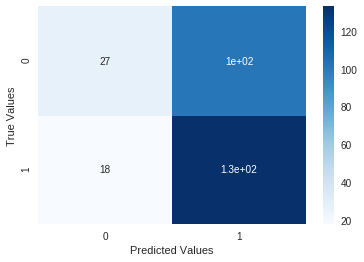

precision: [ 0.6         0.56595745]
recall: [ 0.20930233  0.8807947 ]
fscore: [ 0.31034483  0.68911917]
support: [129 151]


In [105]:
#Evaluation Metrics for SVM -- 2 labels
#Confusion Matrix, accuracy, recall, precision and f1-score
print(metrics.confusion_matrix(y_test, svm_preds))
print(metrics.accuracy_score(y_test, svm_preds))
print(metrics.recall_score(y_test, svm_preds,average='macro'))
print(metrics.precision_score(y_test, svm_preds,average='macro'))
print(metrics.f1_score(y_test, svm_preds,average='macro'))

ht = sns.heatmap(pd.DataFrame(metrics.confusion_matrix(y_test, svm_preds)), annot=True, cmap="Blues")
ht.set(xlabel='Predicted Values', ylabel='True Values')
plt.show()

#Another way to view these metrics for every class label
precision, recall, fscore, support = metrics.precision_recall_fscore_support(y_test, svm_preds)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

### Neural Networks (MLP)

In [27]:
import numpy as np

parameters = {'activation':['tanh', 'relu', 'logistic'], 'alpha':np.logspace(-5, 3, 5), 'hidden_layer_sizes':[(10,),(50,),(100,)],'solver':['sgd','adam'],'learning_rate':['constant','invscaling'],'learning_rate_init':[0.001,1]}
mlpmod = MLPClassifier(activation='tanh',solver='sgd',random_state=1)
clfmlp = GridSearchCV(mlpmod, parameters, cv=2)
clfmlp.fit(x_trains, y_train.values.ravel())
print(clfmlp.best_params_)
mlp_preds = clfmlp.predict(x_tests)
print(mlp_preds)

/home/cloudera/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


GridSearchCV(cv=2, error_score='raise',
       estimator=MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'solver': ['sgd', 'adam'], 'activation': ['tanh', 'relu', 'logistic'], 'hidden_layer_sizes': [(10,), (50,), (100,)], 'alpha': array([  1.00000e-05,   1.00000e-03,   1.00000e-01,   1.00000e+01,
         1.00000e+03]), 'learning_rate': ['constant', 'invscaling'], 'learning_rate_init': [0.001, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

{'solver': 'sgd', 'activation': 'relu', 'hidden_layer_sizes': (100,), 'alpha': 1.0000000000000001e-05, 'learning_rate': 'invscaling', 'learning_rate_init': 1}
[ 1  1 -1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1 -1  1  1 -1  1  1 -1  1 -1
  1  1  1  1  1  1  1  1 -1  1  1  1 -1  1  1 -1  1 -1  1 -1  1  1 -1  1  1
  1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1 -1  1 -1  1 -1  1
 -1  1  1  1  1  1 -1  1 -1  1  1  1  1  1  1 -1  1  1  1  1  1  1 -1  1  1
  1 -1 -1 -1  1 -1  1 -1  1  1 -1  1 -1 -1 -1  1 -1  1  1  1 -1  1  1  1  1
  1 -1  1  1  1  1 -1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1
  1 -1 -1  1  1  1  1  1  1  1 -1  1 -1 -1  1  1  1  1  1 -1  1 -1  1  1  1
 -1 -1  1 -1 -1  1  1  1 -1 -1  1  1  1  1  1  1 -1  1 -1  1  1  1 -1 -1  1
 -1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1  1  1 -1  1  1  1 -1 -1
 -1  1  1  1  1  1  1 -1  1  1  1 -1  1  1 -1  1  1  1 -1  1  1 -1  1 -1  1
  1  

[[ 41  88]
 [ 32 119]]
0.571428571429
0.552954463782
0.568261531335
0.535372531667


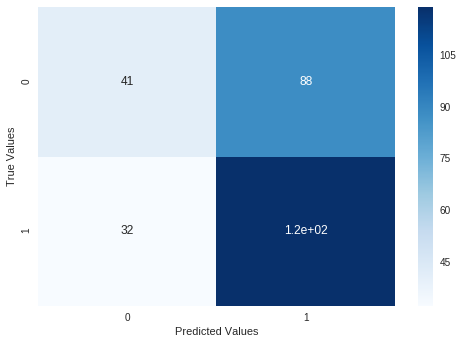

precision: [ 0.56164384  0.57487923]
recall: [ 0.31782946  0.78807947]
fscore: [ 0.40594059  0.66480447]
support: [129 151]


In [28]:
#Evaluation Metrics for MLP -- 2 labels
#Confusion Matrix, accuracy, recall, precision and f1-score
print(metrics.confusion_matrix(y_test, mlp_preds))
print(metrics.accuracy_score(y_test, mlp_preds))
print(metrics.recall_score(y_test, mlp_preds,average='macro'))
print(metrics.precision_score(y_test, mlp_preds,average='macro'))
print(metrics.f1_score(y_test, mlp_preds,average='macro'))

ht = sns.heatmap(pd.DataFrame(metrics.confusion_matrix(y_test, mlp_preds)), annot=True, cmap="Blues")
ht.set(xlabel='Predicted Values', ylabel='True Values')
plt.show()

#Another way to view these metrics for every class label
precision, recall, fscore, support = metrics.precision_recall_fscore_support(y_test, mlp_preds)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))